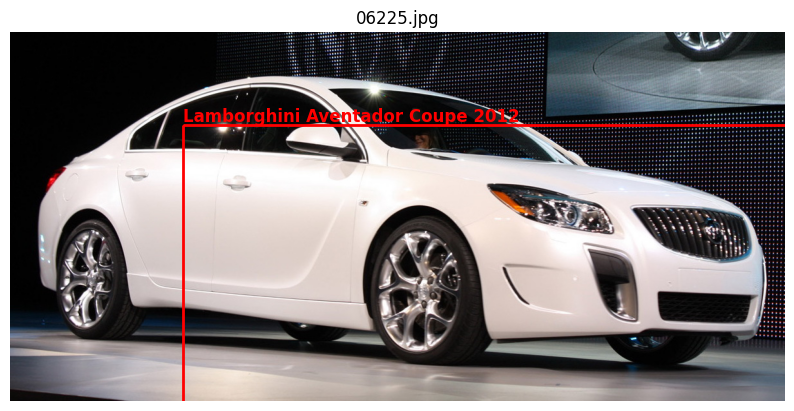

In [5]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

# 경로 설정
annotation_path = './data/cars196/annotations_coco.json'  # COCO JSON
image_dir = '../dataset/cars_train/cars_train'  # 이미지 디렉토리 (변경 가능)

# COCO JSON 로드
with open(annotation_path, 'r') as f:
    coco = json.load(f)

# 매핑 만들기
img_id_to_info = {img['id']: img for img in coco['images']}
cat_id_to_name = {cat['id']: cat['name'] for cat in coco['categories']}

# 시각화할 이미지 1장 무작위 선택
image_id = random.choice(list(img_id_to_info.keys()))
image_info = img_id_to_info[image_id]
file_path = os.path.join(image_dir, image_info['file_name'])

# 이미지 로드
img = Image.open(file_path)

# 시각화 시작
fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(img)
ax.set_title(image_info['file_name'])

# 해당 이미지에 대한 어노테이션만 필터링
annotations = [ann for ann in coco['annotations'] if ann['image_id'] == image_id]

# 박스 그리기
for ann in annotations:
    bbox = ann['bbox']  # [x, y, width, height]
    class_name = cat_id_to_name[ann['category_id']]
    rect = patches.Rectangle(
        (bbox[0], bbox[1]), bbox[2], bbox[3],
        linewidth=2, edgecolor='red', facecolor='none'
    )
    ax.add_patch(rect)
    ax.text(bbox[0], bbox[1] - 5, class_name, color='red', fontsize=12, weight='bold')

plt.axis('off')
plt.show()

In [7]:
import scipy.io
import json
import os

# 경로 설정
mat_path = '../dataset/cars_annos.mat'

# 데이터 로드
mat = scipy.io.loadmat(mat_path)
annotations = mat['annotations'][0]

In [14]:
annotations

array([(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       ...,
       (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
       (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([[60]],